In [1]:
#Import all standrad librires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
warnings.filterwarnings('ignore')

#  **Data Loading process**

In [2]:
data=pd.read_csv('/kaggle/input/clean-quora-train-data/clean_lem_stemmed_train_data.csv')
data.head()

,Unnamed: 0,qid,question_text,target
0,0,00002165364db923c7e6,how did quebec nationalists see their province...,0
1,1,000032939017120e6e44,do you have an adopted dog how would you encou...,0
2,2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0
3,3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0
4,4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0


In [3]:
#Checking the shape of the dataset
data.shape

(1306122, 4)

In [4]:
#Remove the unwanted columns
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,qid,question_text,target
0,00002165364db923c7e6,how did quebec nationalists see their province...,0
1,000032939017120e6e44,do you have an adopted dog how would you encou...,0
2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0


<AxesSubplot:ylabel='target'>

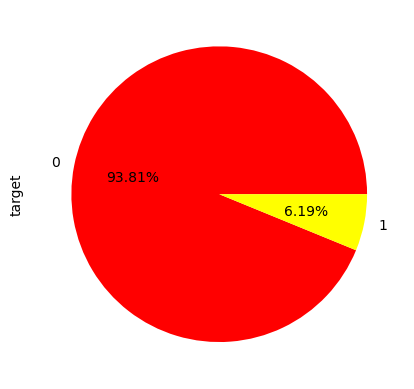

In [5]:
#Lets's find the target columns values
data['target'].value_counts(normalize=True).plot(kind='pie',colors=['red','yellow'],autopct='%1.2f%%')

**The data contain insincere question less compare to the sincere question**

In [6]:
#Just separate the sincere question with target values ==0
sincere_df=data[data.target==0]
#And visualize it 
sincere_df.question_text.values[:10]

array(['how did quebec nationalists see their province as a nation in the s',
       'do you have an adopted dog how would you encourage people to adopt and not shop',
       'why does velocity affect time does velocity affect space geometry',
       'how did otto von guericke used the magdeburg hemispheres',
       'can i convert montra helicon d to a mountain bike by just changing the tyres',
       'is gaza slowly becoming auschwitz dachau or treblinka for palestinians',
       'why does quora automatically ban conservative opinions when reported but does not do the same for liberal views',
       'is it crazy if i wash or wipe my groceries off germs are everywhere',
       'is there such a thing as dressing moderately and if so how is that different than dressing modestly',
       'is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved completely disregarding their feelingslives so you get to have something go your way and feel te

In [7]:
#Same as insincere_questions
insincere_df=data[data.target==1]
#And visualize it 
insincere_df.question_text.values[:10]

array(['has the united states become the largest dictatorship in the world',
       'which babies are more sweeter to their parents dark skin babies or light skin babies',
       'if blacks support school choice and mandatory sentencing for criminals why dont they vote republican',
       'i am gay boy and i love my cousin boy he is sexy but i dont know what to do he is hot and i want to see his di what should i do',
       'which races have the smallest penis',
       'why do females find penises ugly',
       'how do i marry an american woman for a green card how much do they charge',
       'why do europeans say theyre the superior race when in fact it took them over  years until mid th century to surpass chinas largest economy',
       'did julius caesar bring a tyrannosaurus rex on his campaigns to frighten the celts into submission',
       'in what manner has republican backing of states rights been hypocritical and what ways have they actually restricted the ability of states t

# We take the 1 Laksh sample dataset

In [8]:
#Let's take the 10 thousand samples data set
sample_size=100000
sample_df=data.sample(sample_size,random_state=42)
sample_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,what is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,can i study abroad after th class from bangladesh,0
523769,6689ebaeeb65b209a412,how can i make friends as a college junior,0
949821,ba1e2c4a0fef09671516,how do i download free apk minecraft pocket ed...,0
1030397,c9ea2b69bf0d74626f46,like kuvera is groww also a free online invest...,0


# Text Preprocessing  Stage

* **1) Bag of words 2) Tokenization 3) Stopwords 4)Stemming**

In [9]:
#Just take one question and apply on it
q1=sample_df[sample_df.target==0]
q2=q1.question_text.values[0]
q2

'what is the most effective classroom management skilltechnique to create a good learning environment'

# Tokenization: Splitting the sentence into words.

**from nltk.tokenize import word_tokenize**

**sentence = "Books are on the table"**

**words = word_tokenize(sentence)
**1. print(words)
Output: ['Books', 'are', 'on', 'the', 'table']**

In [10]:
#Here is the senetence and apply to the tokenizations
q2_tok=word_tokenize(q2)

In [11]:
#Set varible call stopwords to remove the stop words in the datasett
english_stopwords=stopwords.words('english')


In [12]:
",".join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

# Stop words removal: Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.

In [13]:
#To remove the stopwords to first we apply the q2 and then apply to the sample dataset
def remove_stopwords(text):
    return [word for word in text if word.lower() not in english_stopwords]

In [14]:
q2

'what is the most effective classroom management skilltechnique to create a good learning environment'

In [15]:
#Apply the stopwords removble function
q1_stp=remove_stopwords(q2_tok)
q1_stp

['effective',
 'classroom',
 'management',
 'skilltechnique',
 'create',
 'good',
 'learning',
 'environment']

# # Stemming Process 
**Stemming: It is a process of transforming a word to its root form.**

In [16]:
stemmer=SnowballStemmer(language='english')
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stm

['effect',
 'classroom',
 'manag',
 'skilltechniqu',
 'creat',
 'good',
 'learn',
 'environ']

In [17]:
#Create a function for the stemming process
def stemming(text):
    #all text convert to the lower case
#     text=text.lower()
    stemmer=SnowballStemmer(language='english')
    text=[stemmer.stem(word) for word in q1_stp]
    text=' '.join(text)
    return text

# Lemmatization
**Lemmatization: Unlike stemming, lemmatization reduces the words to a word existing in the language.**

In [18]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
q1_lem=lemmatizer.lemmatize(q2)
q1_lem

'what is the most effective classroom management skilltechnique to create a good learning environment'

In [19]:
#Create a function to the lemmatization
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    text=text.lower()
    text=[lemmatizer.lemmatize(word) for word in text]
    text=''.join(text)
    return text

# Apply all the function to the sample dataset

In [20]:
def text_preprocessing(text):
    #Word_tokenize
    words=word_tokenize(text)
    #Stop words removeble
    words=[word for word in words if word not in english_stopwords]
    #Stemming process
    words=[stemmer.stem(word) for word in words]
    #Lmmmatization
    words=[lemmatizer.lemmatize(word) for word in words]
    # Convert all words to lowercase
    words = [word.lower() for word in words]
    words=''.join(words)
    return words

In [21]:
sample_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,what is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,can i study abroad after th class from bangladesh,0
523769,6689ebaeeb65b209a412,how can i make friends as a college junior,0
949821,ba1e2c4a0fef09671516,how do i download free apk minecraft pocket ed...,0
1030397,c9ea2b69bf0d74626f46,like kuvera is groww also a free online invest...,0


In [22]:
#Fistly apply the stopwords_remove function to the dataset
# sample_df['question_text']=sample_df['question_text'].apply(remove_stopwords)
# sample_df['question_text']=sample_df['question_text'].apply(stemming)
# sample_df['question_text']=sample_df['question_text'].apply(lemmatization)

# sample_df.head(2)

In [23]:
sample_df['question_text']=sample_df['question_text'].apply(text_preprocessing)
sample_df.head(4)

,qid,question_text,target
443046,56d324bb1e2c29f43b12,effectclassroommanagskilltechniqucreatgoodlear...,0
947549,b9ad893dc78c577f8a63,studiabroadthclassbangladesh,0
523769,6689ebaeeb65b209a412,makefriendcollegjunior,0
949821,ba1e2c4a0fef09671516,downloadfreeapkminecraftpocketeditioiphon,0


In [24]:
sample_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,effectclassroommanagskilltechniqucreatgoodlear...,0
947549,b9ad893dc78c577f8a63,studiabroadthclassbangladesh,0
523769,6689ebaeeb65b209a412,makefriendcollegjunior,0
949821,ba1e2c4a0fef09671516,downloadfreeapkminecraftpocketeditioiphon,0
1030397,c9ea2b69bf0d74626f46,likekuveragrowwalsofreeonlininvestplatforminve...,0


# Let's make Machine Learning Model

In [25]:
#From the above data divided into x and y
X=sample_df.drop(['qid','target'],axis=1)
y=sample_df['target']


In [26]:
small_vect = CountVectorizer()
small_vect.fit(sample_df.question_text)


CountVectorizer()

In [27]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [28]:
#covert the all words into vector using CountVectorizer
count=CountVectorizer(lowercase=True, 
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [29]:
count.fit(sample_df.question_text)
X=count.transform(sample_df.question_text)

In [30]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
#divided the x and y into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 1000)
(25000, 1000)
(75000,)
(25000,)


# Model Buliding.We Predict the taget using the Classification Algorithms

The LogisticRegression() socre is 93.98
Classification report               precision    recall  f1-score   support

           0       0.94      1.00      0.97     23496
           1       0.00      0.00      0.00      1504

    accuracy                           0.94     25000
   macro avg       0.47      0.50      0.48     25000
weighted avg       0.88      0.94      0.91     25000

[[23496     0]
 [ 1504     0]]


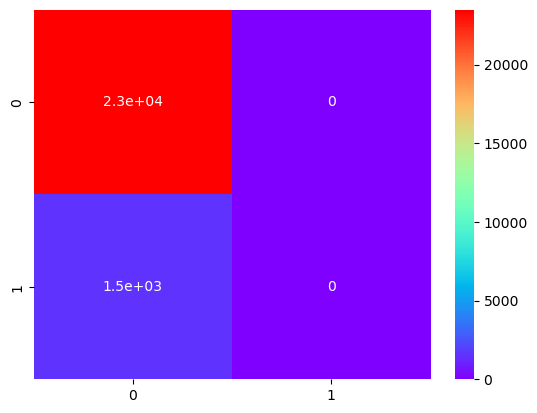

In [33]:
from sklearn.metrics import accuracy_score
import seaborn as sns
def model_bulid(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)
    print(f'The {model} socre is {accuracy_score(y_test,model_pred)*100:.2f}')
    print('Classification report',classification_report(y_test,model_pred))
    matrix=confusion_matrix(y_test,model_pred)
    print(matrix)
    sns.heatmap(matrix,annot=True,cmap='rainbow',xticklabels=['0','1'],yticklabels=['0','1'])
    
#Checking the linear regression model
linear=LogisticRegression()
model_bulid(linear,X_train,X_test,y_train,y_test)

The DecisionTreeClassifier() socre is 93.99
Classification report               precision    recall  f1-score   support

           0       0.94      1.00      0.97     23496
           1       0.67      0.00      0.00      1504

    accuracy                           0.94     25000
   macro avg       0.80      0.50      0.49     25000
weighted avg       0.92      0.94      0.91     25000

[[23495     1]
 [ 1502     2]]


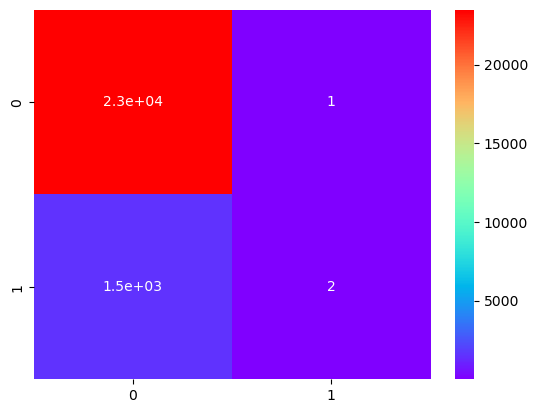

In [34]:
#Apply for decisionTree algorithms for the model
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
model_bulid(tree,X_train,X_test,y_train,y_test)

The RandomForestClassifier() socre is 93.99
Classification report               precision    recall  f1-score   support

           0       0.94      1.00      0.97     23496
           1       0.67      0.00      0.00      1504

    accuracy                           0.94     25000
   macro avg       0.80      0.50      0.49     25000
weighted avg       0.92      0.94      0.91     25000

[[23495     1]
 [ 1502     2]]


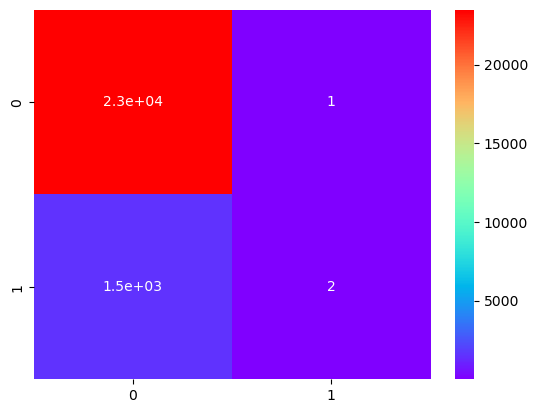

In [35]:
#Apply the Randomforestcalssifier algotihms
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
model_bulid(random,X_train,X_test,y_train,y_test)

The XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) socre is 93.98
Classification report               precision    recall  f1-score   support

           0       0.94      1.00      0.97     23496
           1       0.00      0.00      0.00      1504

    accuracy                           0.94     25000
   macro avg       0.47      0.50      0.4

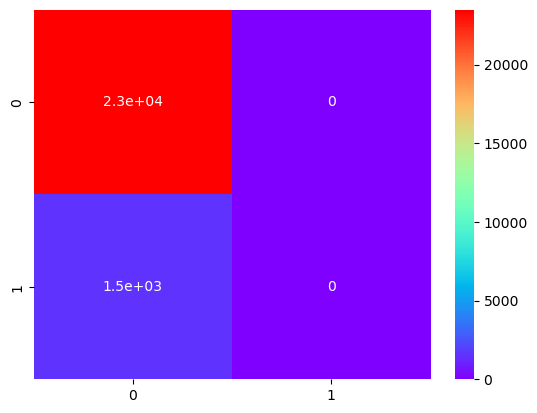

In [36]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_bulid(xgb,X_train,X_test,y_train,y_test)

The XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) socre is 93.98
Classification report               precision    recall  f1-score   support

           0       0.94      1.00      0.97     23496
           1       0.00      0.00      0.00      1504

    accuracy                           0.94     25000
   macro avg       0.47      0.50      0.4

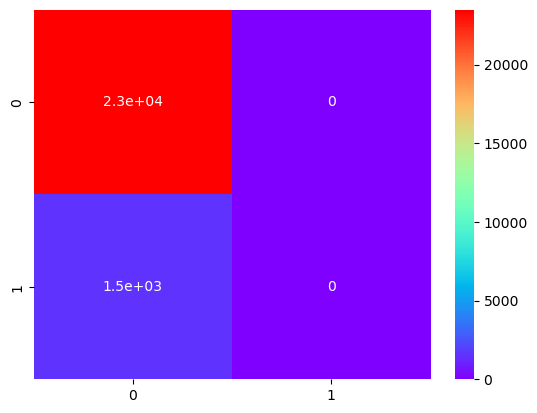

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model_bulid(xgb,X_train,X_test,y_train,y_test)

# About The data
**Once we take the data to analzed the data and which columns useful or not after that we remove not usefull columns and then we do the data prerprocessing steps**


**This is NLP Classification Problem once we remove the data and take l lakh sample as a subdataset because it's to large dataset**

# Process
**We split the data into tokenes and then we remove all the stopwords in the sample data set afte we stemmeing process and finally lemmantization also we applied to the sample questions and then we create one function to do all work and apply to the small data question_text.columns**

# Machine Learning
**Then we get clean and unknown words ,root words all are removed the we covert the text into vectos using the count vectors and divided the data into train and test dataset. Then it's ready for machine Learning Modeling. We define a function which is runs to the all machine learning models.We use Logistic,Decisiontree,Random,XGB all calsifier algorihms used. All classification algorithms give 94% accuracy score to the model. This is best model with good accuracy score**